# 交易游戏项目数据分析 r19 90days

#### 目录：

### [1.原始数据分布图](#1)

### [2. 观察值归一化，求mean、max](#2)
将数据值根据大小尺度分为四类：1.价格，2.买一二三卖一二三的量，3.总交易量，4.target

求出合适的归一化mean和max值：

```
price_mean = 26440.28
price_max = 27952.0
bid_ask_volume_log_mean = 1.97
bid_ask_volume_log_max = 6.42
total_volume_mean = 120755.66
total_volume_max = 321988.0
target_mean = 2.55
target_max = 311.0
```

### [3.归一化数据分布](#3)

### [4.数据变化情况（target, last price）](#4)

### [5.小尺度数据分析（第一天数据）](#5)

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
all_data = pd.read_csv("/home/shuai/trading-game/r19-90days_data.csv")

In [3]:
all_data = pd.read_csv("baseline_policy_069_62.csv")

In [3]:
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20161459 entries, 0 to 20161458
Data columns (total 50 columns):
Unnamed: 0           int64
Done                 int64
LastPrice            int64
BidPrice1            int64
BidVolume1           int64
AskPrice1            int64
AskVolume1           int64
BidPrice2            int64
BidVolume2           int64
AskPrice2            int64
AskVolume2           int64
BidPrice3            int64
BidVolume3           int64
AskPrice3            int64
AskVolume3           int64
BidPrice4            int64
BidVolume4           int64
AskPrice4            int64
AskVolume4           int64
BidPrice5            int64
BidVolume5           int64
AskPrice5            int64
AskVolume5           int64
Volume               int64
HighestPrice         int64
LowestPrice          int64
TradingDay           int64
Target_Num           int64
Actual_Num           int64
AliveBidPrice1       int64
AliveBidVolume1      int64
AliveBidPrice2       int64
AliveBidVolume2      

In [4]:
print(all_data.describe())

         Unnamed: 0          Done     LastPrice     BidPrice1    BidVolume1  \
count  2.016146e+07  2.016146e+07  2.016146e+07  2.016146e+07  2.016146e+07   
mean   1.008073e+07  4.463963e-06  2.644056e+04  2.643981e+04  4.832864e+00   
std    5.820112e+06  2.112805e-03  5.852023e+02  5.850039e+02  4.065651e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  2.481100e+04  1.000000e+00   
25%    5.040364e+06  0.000000e+00  2.601100e+04  2.601000e+04  2.000000e+00   
50%    1.008073e+07  0.000000e+00  2.649600e+04  2.649600e+04  4.000000e+00   
75%    1.512109e+07  0.000000e+00  2.685300e+04  2.685200e+04  6.000000e+00   
max    2.016146e+07  1.000000e+00  2.794700e+04  2.794600e+04  3.150000e+02   

          AskPrice1    AskVolume1     BidPrice2    BidVolume2     AskPrice2  \
count  2.016146e+07  2.016146e+07  2.016146e+07  2.016146e+07  2.016146e+07   
mean   2.644132e+04  4.879065e+00  2.643880e+04  9.043710e+00  2.644234e+04   
std    5.849844e+02  4.486683e+00  5.850017e+02  5.

In [3]:
all_price = pd.DataFrame(all_data, columns=['LastPrice', 'BidPrice1', 'BidPrice2', 'BidPrice3', 'BidPrice4', 'BidPrice5', 'AskPrice1', 'AskPrice2', 'AskPrice3', 'AskPrice4', 'AskPrice5', 'HighestPrice', 'LowestPrice'])
bid_ask_volume = pd.DataFrame(all_data, columns=['BidVolume1', 'BidVolume2', 'BidVolume3', 'BidVolume4', 'BidVolume5', 'AskVolume1', 'AskVolume2', 'AskVolume3', 'AskVolume4', 'AskVolume5'])
total_volume = pd.DataFrame(all_data, columns=['Volume'])
target_num = pd.DataFrame(all_data, columns=['Target_Num'])

In [5]:
all_price = pd.DataFrame(all_data, columns=['LastPrice', 'BidPrice1', 'BidPrice2', 'BidPrice3', 'BidPrice4', 'BidPrice5', 'AskPrice1', 'AskPrice2', 'AskPrice3', 'AskPrice4', 'AskPrice5', 'HighestPrice', 'LowestPrice'])

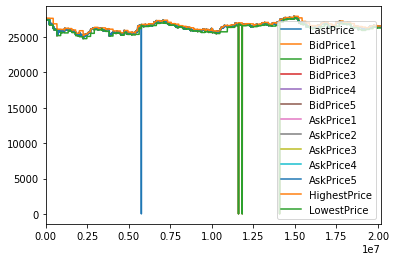

In [4]:
all_price.plot()

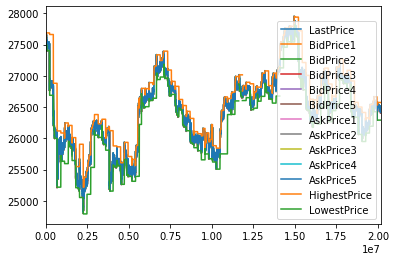

In [6]:
all_price[all_price>0].plot()

In [3]:
bid_ask_volume = pd.DataFrame(all_data, columns=['BidVolume1', 'BidVolume2', 'BidVolume3', 'BidVolume4', 'BidVolume5', 'AskVolume1', 'AskVolume2', 'AskVolume3', 'AskVolume4', 'AskVolume5'])

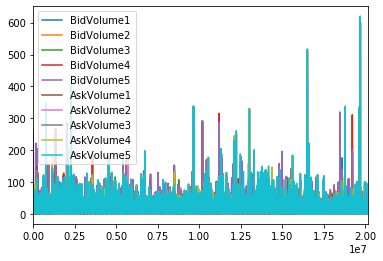

In [4]:
bid_ask_volume.plot()

In [5]:
log_bid_ask_volume = np.log(bid_ask_volume[bid_ask_volume > 0])

/home/shuai/py36venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


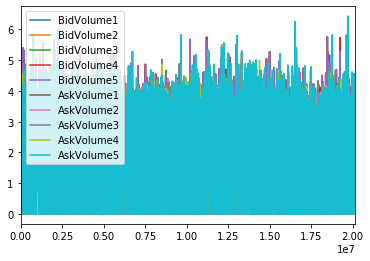

In [6]:
log_bid_ask_volume.plot()

In [9]:
total_volume = pd.DataFrame(all_data, columns=['Volume'])

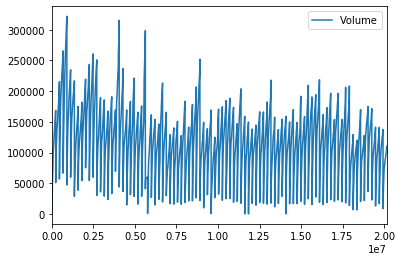

In [10]:
total_volume.plot()

In [5]:
target_num = pd.DataFrame(all_data, columns=['Target_Num'])

In [7]:
target_num_abs = np.abs(target_num)

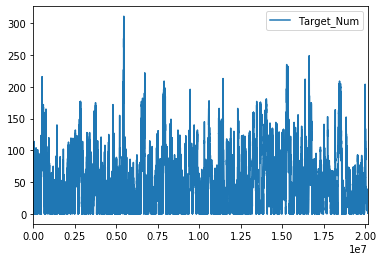

In [7]:
target_num_abs.plot()

r12:

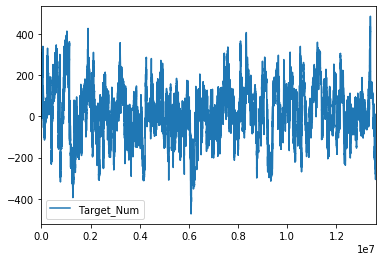

In [6]:
target_num.plot()

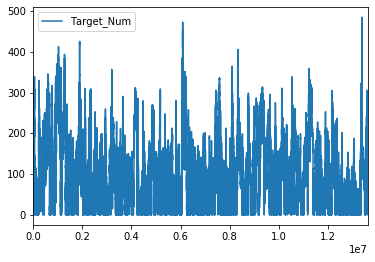

In [8]:
target_num_abs.plot()

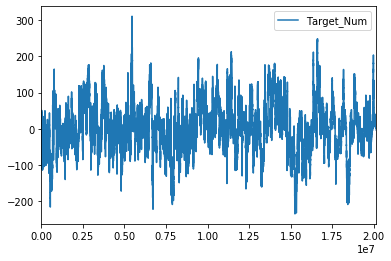

In [8]:
target_num.plot()

<a id='2'></a>
### 2. 观察值归一化，求mean、max

In [16]:
price_describe = all_price[all_price > 0].describe()
price_mean = sum(price_describe.iloc[1])/13
price_max = max(price_describe.iloc[7])
print(price_mean, price_max)

26440.285610191615 27952.0


In [8]:
log_bid_ask_volume = np.log(bid_ask_volume[bid_ask_volume > 0])
bid_ask_volume_describe = log_bid_ask_volume.describe()
bid_ask_volume_mean = sum(bid_ask_volume_describe.iloc[1])/10
bid_ask_volume_max = max(bid_ask_volume_describe.iloc[7])
print(bid_ask_volume_mean, bid_ask_volume_max)

1.9736477285210245 6.429719478039138


In [ ]:
bid_ask_volume_describe = bid_ask_volume[bid_ask_volume > 0].describe()
bid_ask_volume_mean = sum(bid_ask_volume_describe.iloc[1])/10
bid_ask_volume_max = max(bid_ask_volume_describe.iloc[7])
print(bid_ask_volume_mean, bid_ask_volume_max)

In [11]:
total_volume_describe = total_volume.describe()
total_volume_mean = sum(total_volume_describe.iloc[1])
total_volume_max = max(total_volume_describe.iloc[7])
print(total_volume_mean, total_volume_max)

120755.66671077724 321988.0


In [8]:
target_describe = target_num.describe()
target_mean = sum(target_describe.iloc[1])
target_max = max(target_describe.iloc[7])
print(target_mean, target_max)

2.551221466660721 311.0


In [9]:

target_num_abs_describe = target_num_abs.describe()
target_num_abs_mean = sum(target_num_abs_describe.iloc[1])
target_num_abs_max = max(target_num_abs_describe.iloc[7])
print(target_num_abs_mean, target_num_abs_max)

51.01815047214589 311.0


r12:

In [9]:
target_num_abs_describe = target_num_abs.describe()
target_num_abs_mean = sum(target_num_abs_describe.iloc[1])
target_num_abs_max = max(target_num_abs_describe.iloc[7])
print(target_num_abs_mean, target_num_abs_max)

100.861579138586 485.0


In [4]:

price_mean = 26440.28
price_max = 27952.0
log_bid_ask_volume_mean = 1.97
log_bid_ask_volume_max = 6.42
total_volume_mean = 120755.66
total_volume_max = 321988.0
target_mean = 2.13
target_max = 311.0
target_num_abs_mean = 51.01815047214589

In [18]:
all_price_n = (all_price-price_mean)/(price_max-price_mean)
bid_ask_volume_n = (bid_ask_volume-bid_ask_volume_mean)/(bid_ask_volume_max-bid_ask_volume_mean)
total_volume_n = (total_volume-total_volume_mean)/(total_volume_max-total_volume_mean)
target_n = (target_num-target_mean)/(target_max-target_mean)

注：归一化特殊值（如最新价的0）

In [19]:
all_price_n[all_price_n < -1] = -1
all_price_n[all_price_n > 1] = 1
bid_ask_volume_n[bid_ask_volume_n < -1] = -1
bid_ask_volume_n[bid_ask_volume_n > 1] = 1
total_volume_n[total_volume_n < -1] = -1
total_volume_n[total_volume_n > 1] = 1
target_n[target_n < -1] = -1
target_n[target_n > 1] = 1

<a id='3'></a>
### 3.归一化数据分布

In [5]:
all_price_n = (all_price-price_mean)/(price_max-price_mean)

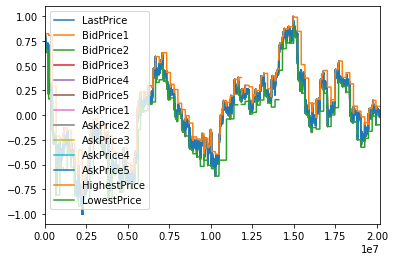

In [6]:
all_price_n[all_price_n>-1].plot()

In [ ]:
bid_ask_volume_n = (bid_ask_volume-bid_ask_volume_mean)/(bid_ask_volume_max-bid_ask_volume_mean)

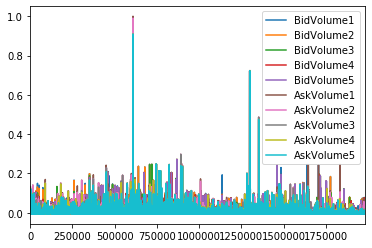

In [56]:
bid_ask_volume_n.plot()

In [ ]:
total_volume_n = (total_volume-total_volume_mean)/(total_volume_max-total_volume_mean)

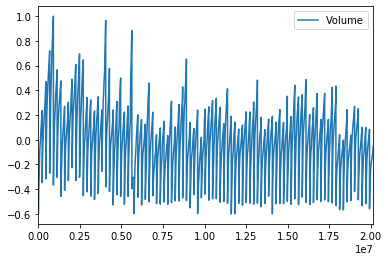

In [21]:
total_volume_n.plot()

In [ ]:
target_n = (target_num-target_mean)/(target_max-target_mean)

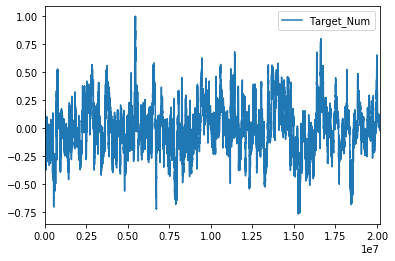

In [20]:
target_n.plot()

<a id='4'></a>
### 4.数据变化情况（target, last price）

In [3]:
day_data = []
for i in range(1, 91):
    day_data.append(all_data[all_data['TradingDay']==i])

In [4]:
day_data[0].tail()

,Unnamed: 0,Done,LastPrice,BidPrice1,BidVolume1,AskPrice1,AskVolume1,BidPrice2,BidVolume2,AskPrice2,AskVolume2,BidPrice3,BidVolume3,AskPrice3,AskVolume3,BidPrice4,BidVolume4,AskPrice4,AskVolume4,BidPrice5,BidVolume5,AskPrice5,AskVolume5,Volume,HighestPrice,LowestPrice,TradingDay,Target_Num,Actual_Num,AliveBidPrice1,AliveBidVolume1,AliveBidPrice2,AliveBidVolume2,AliveBidPrice3,AliveBidVolume3,AliveBidPriceNUM,AliveBidVolumeNUM,AliveAskPrice1,AliveAskVolume1,AliveAskPrice2,AliveAskVolume2,AliveAskPrice3,AliveAskVolume3,AliveAskPriceNUM,AliveAskVolumeNUM,score,profit,total_profit,baseline_profit,close_profit
225009,225009,0,27445,27445,5,27453,1,27444,8,27454,1,27443,4,27455,3,27442,2,27456,1,27441,2,27457,2,168535,27685,27401,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,0,0,78700,0
225010,225010,0,27445,27445,5,27453,1,27444,8,27454,1,27443,4,27455,3,27442,2,27456,1,27441,2,27457,2,168535,27685,27401,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,0,0,78700,0
225011,225011,0,27445,27445,5,27453,1,27444,8,27454,1,27443,4,27455,3,27442,2,27456,1,27441,2,27457,2,168535,27685,27401,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,0,0,78700,0
225012,225012,0,27445,27445,5,27453,1,27444,8,27454,1,27443,4,27455,3,27442,2,27456,1,27441,2,27457,2,168535,27685,27401,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,0,0,78700,0
225013,225013,1,27445,27445,3,27453,1,27444,2,27454,1,27443,1,27455,3,27441,1,27456,1,27440,206,27457,2,168535,27685,27401,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,0,0,78700,0


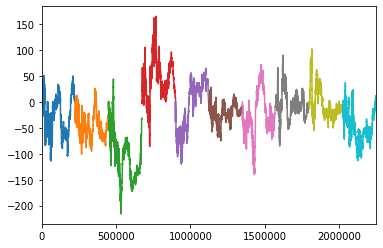

In [5]:
for i in range(0, 10):
    day_data[i]["Target_Num"].plot()

r18:

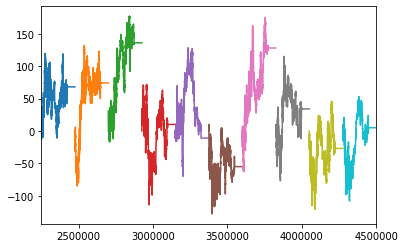

In [6]:
for i in range(10, 20):
    day_data[i]["Target_Num"].plot()

r19:

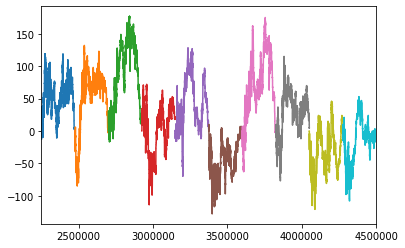

In [6]:
for i in range(10, 20):
    day_data[i]["Target_Num"].plot()

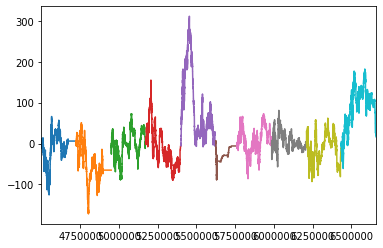

In [7]:
for i in range(20, 30):
    day_data[i]["Target_Num"].plot()

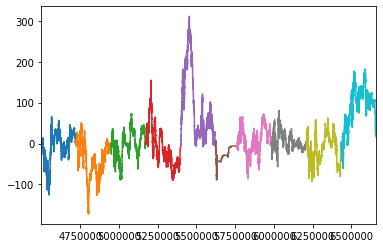

In [7]:
for i in range(20, 30):
    day_data[i]["Target_Num"].plot()

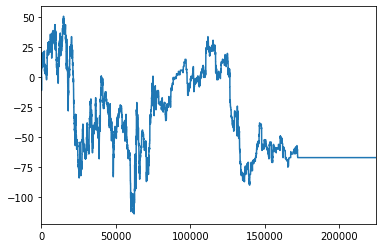

In [8]:
day_data[0]["Target_Num"].plot()

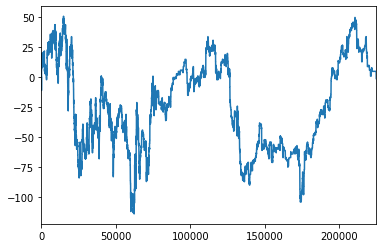

In [8]:
day_data[0]["Target_Num"].plot()

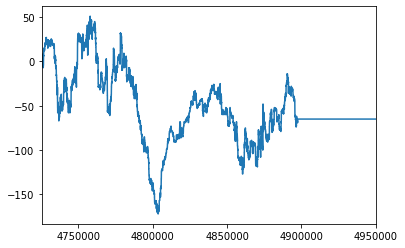

In [33]:
day_data[21]["Target_Num"].plot()

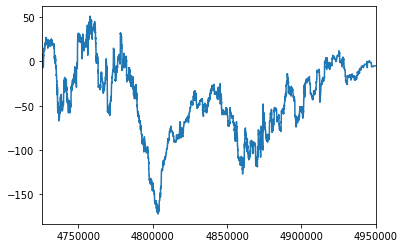

In [9]:
day_data[21]["Target_Num"].plot()

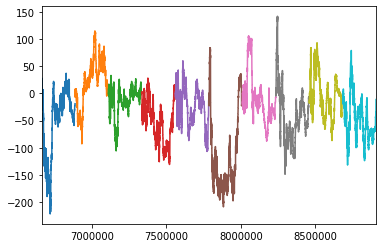

In [12]:
for i in range(30, 40):
    day_data[i]["Target_Num"].plot()

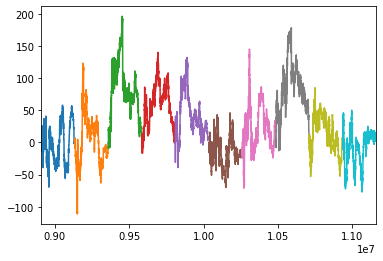

In [13]:
for i in range(40, 50):
    day_data[i]["Target_Num"].plot()

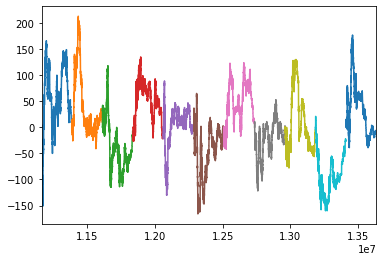

In [14]:
for i in range(50, 61):
    day_data[i]["Target_Num"].plot()

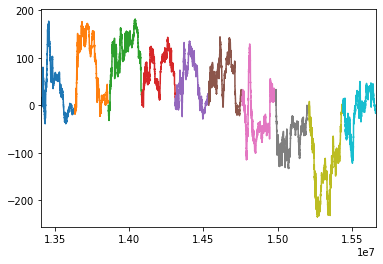

In [15]:
for i in range(60, 70):
    day_data[i]["Target_Num"].plot()

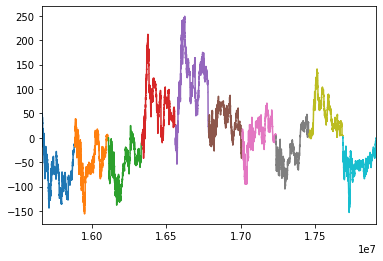

In [16]:
for i in range(70, 80):
    day_data[i]["Target_Num"].plot()

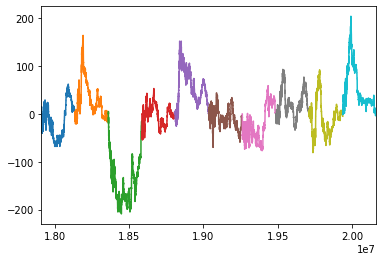

In [17]:
for i in range(80, 90):
    day_data[i]["Target_Num"].plot()

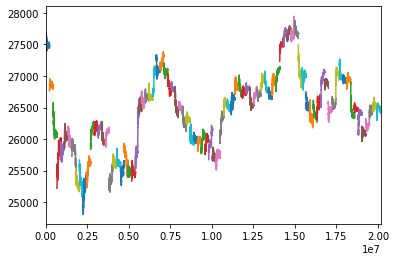

In [19]:
for i in range(0, 90):
    day_data[i]["LastPrice"][day_data[i]["LastPrice"]>0].plot()

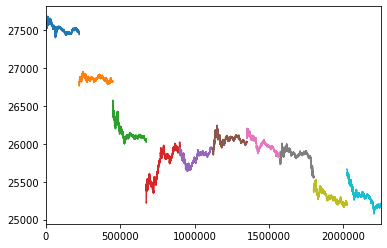

In [20]:
for i in range(0, 10):
    day_data[i]["LastPrice"][day_data[i]["LastPrice"]>0].plot()

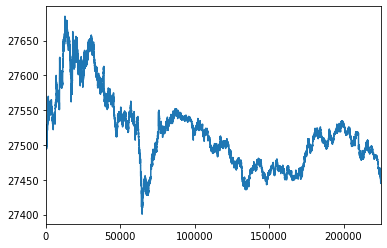

In [30]:
day_data[0]["LastPrice"][day_data[0]["LastPrice"]>0].plot()

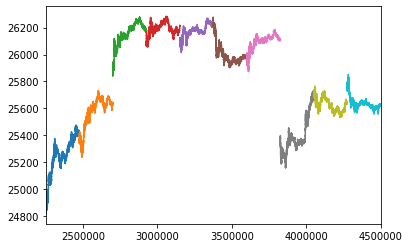

In [10]:
for i in range(10, 20):
    day_data[i]["LastPrice"][day_data[i]["LastPrice"]>0].plot()

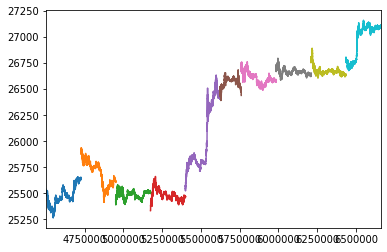

In [22]:
for i in range(20, 30):
    day_data[i]["LastPrice"][day_data[i]["LastPrice"]>0].plot()

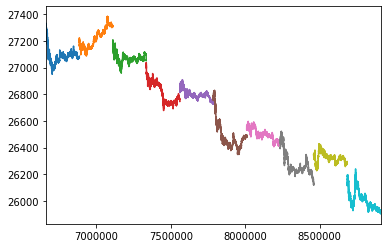

In [23]:
for i in range(30, 40):
    day_data[i]["LastPrice"][day_data[i]["LastPrice"]>0].plot()

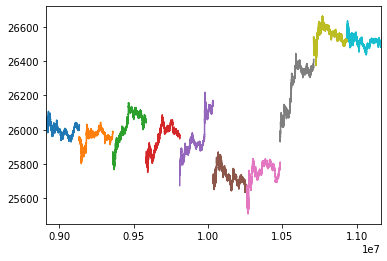

In [24]:
for i in range(40, 50):
    day_data[i]["LastPrice"][day_data[i]["LastPrice"]>0].plot()

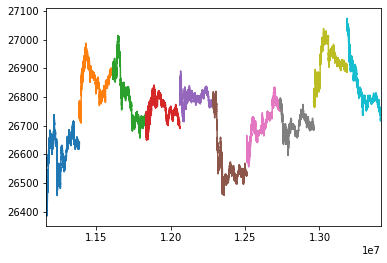

In [25]:
for i in range(50, 60):
    day_data[i]["LastPrice"][day_data[i]["LastPrice"]>0].plot()

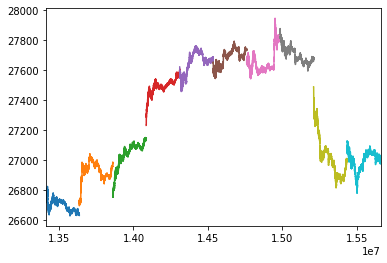

In [26]:
for i in range(60, 70):
    day_data[i]["LastPrice"][day_data[i]["LastPrice"]>0].plot()

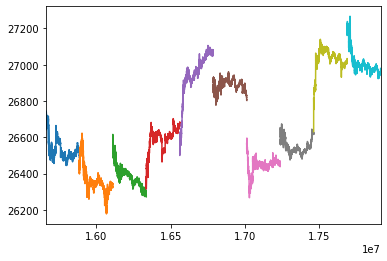

In [27]:
for i in range(70, 80):
    day_data[i]["LastPrice"][day_data[i]["LastPrice"]>0].plot()

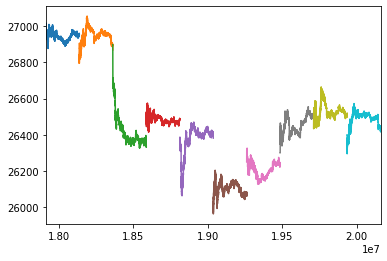

In [28]:
for i in range(80, 90):
    day_data[i]["LastPrice"][day_data[i]["LastPrice"]>0].plot()

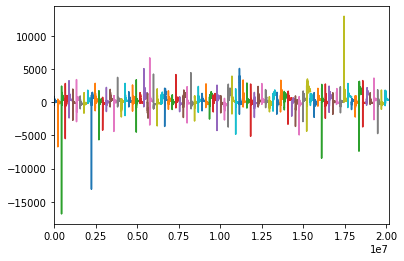

In [35]:
for i in range(0, 90):
    day_data[i]["score"].plot()

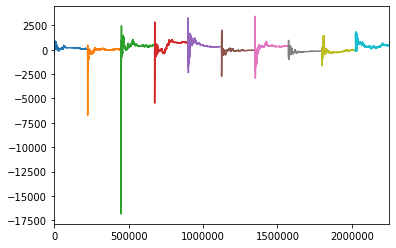

In [34]:
for i in range(0, 10):
    day_data[i]["score"].plot()

<a id='5'></a>
### 5.小尺度数据分析（第一天数据）

In [36]:
day1_price = pd.DataFrame(day_data[0], columns=['LastPrice', 'BidPrice1', 'BidPrice2', 'BidPrice3', 'BidPrice4', 'BidPrice5', 'AskPrice1', 'AskPrice2', 'AskPrice3', 'AskPrice4', 'AskPrice5', 'HighestPrice', 'LowestPrice'])
day1_bid_ask_volume = pd.DataFrame(day_data[0], columns=['BidVolume1', 'BidVolume2', 'BidVolume3', 'BidVolume4', 'BidVolume5', 'AskVolume1', 'AskVolume2', 'AskVolume3', 'AskVolume4', 'AskVolume5'])
day1_total_volume = pd.DataFrame(day_data[0], columns=['Volume'])
day1_target_num = pd.DataFrame(day_data[0], columns=['Target_Num'])

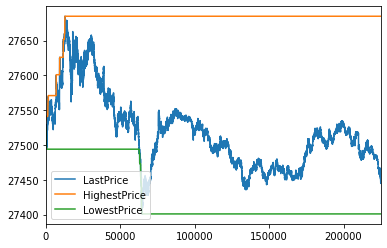

In [37]:
day1_price[["LastPrice", "HighestPrice", "LowestPrice"]].plot()

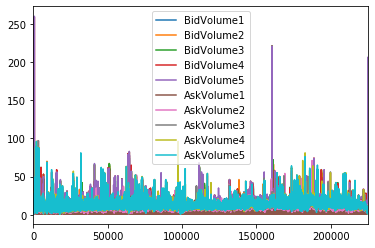

In [38]:
day1_bid_ask_volume.plot()

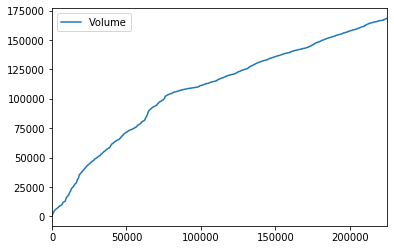

In [39]:
day1_total_volume.plot()

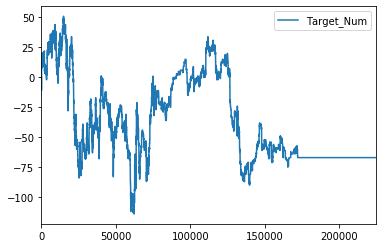

In [40]:
day1_target_num.plot()

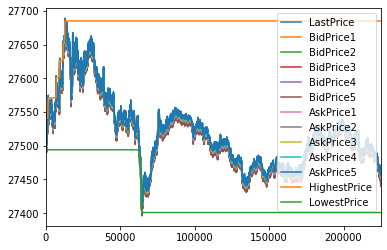

In [41]:
day1_price[day1_price>0].plot()

In [9]:
data1 = pd.read_csv("/home/shuai/trading-game/r18-day1-baseline_policy.csv")

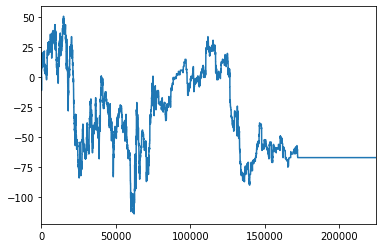

In [11]:
data1['Target_Num'].plot()

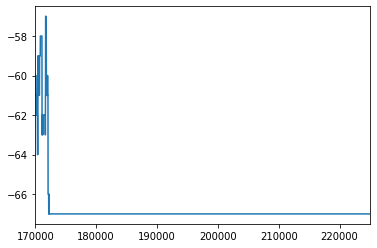

In [17]:
data1['Target_Num'].iloc[170000:].plot()

In [12]:
data2 = pd.read_csv("/home/shuai/trading-game/r18-day2-baseline_policy.csv")

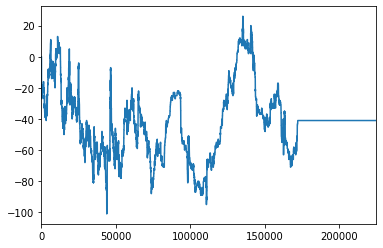

In [13]:
data2['Target_Num'].plot()

In [14]:
all_data.iloc[:10]

,Unnamed: 0,Done,LastPrice,BidPrice1,BidVolume1,AskPrice1,AskVolume1,BidPrice2,BidVolume2,AskPrice2,AskVolume2,BidPrice3,BidVolume3,AskPrice3,AskVolume3,BidPrice4,BidVolume4,AskPrice4,AskVolume4,BidPrice5,BidVolume5,AskPrice5,AskVolume5,Volume,HighestPrice,LowestPrice,TradingDay,Target_Num,Actual_Num,AliveBidPrice1,AliveBidVolume1,AliveBidPrice2,AliveBidVolume2,AliveBidPrice3,AliveBidVolume3,AliveBidPriceNUM,AliveBidVolumeNUM,AliveAskPrice1,AliveAskVolume1,AliveAskPrice2,AliveAskVolume2,AliveAskPrice3,AliveAskVolume3,AliveAskPriceNUM,AliveAskVolumeNUM,score,profit,total_profit,baseline_profit,close_profit
0,0,0,27525,27530,1,27534,1,27525,22,27535,1,27524,3,27538,1,27523,2,27539,5,27521,10,27540,3,469,27536,27525,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,27525,27530,1,27534,1,27525,22,27535,1,27524,3,27538,1,27523,2,27539,5,27521,10,27540,3,469,27536,27525,1,-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,27525,27530,1,27534,1,27525,22,27535,1,27524,3,27538,1,27523,2,27539,5,27521,10,27540,3,469,27536,27525,1,-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,27525,27530,1,27534,1,27525,22,27535,1,27524,3,27538,1,27523,2,27539,5,27521,10,27540,3,469,27536,27525,1,-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,27521,27521,9,27540,3,27520,11,27541,2,27519,1,27542,1,27518,7,27545,6,27517,2,27547,1,564,27539,27521,1,-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,274,0,0,2400,0
5,5,0,27521,27521,9,27540,3,27520,11,27541,2,27519,1,27542,1,27518,7,27545,6,27517,2,27547,1,564,27539,27521,1,-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,274,0,0,2400,0
6,6,0,27522,27523,1,27539,1,27522,2,27540,3,27521,4,27541,1,27520,16,27542,1,27518,7,27544,2,608,27539,27521,1,-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205,0,0,1800,0
7,7,0,27522,27523,1,27539,1,27522,2,27540,3,27521,4,27541,1,27520,16,27542,1,27518,7,27544,2,608,27539,27521,1,-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205,0,0,1800,0
8,8,0,27521,27520,12,27525,1,27518,7,27526,22,27517,1,27529,1,27516,1,27530,1,27515,2,27533,1,649,27541,27520,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,112,0,0,1600,0
9,9,0,27521,27520,12,27525,1,27518,7,27526,22,27517,1,27529,1,27516,1,27530,1,27515,2,27533,1,649,27541,27520,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,112,0,0,1600,0


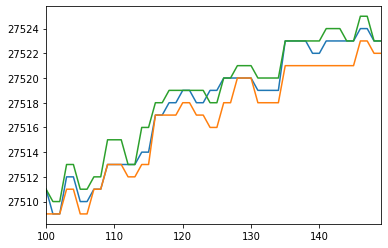

In [17]:
all_data['LastPrice'].iloc[100:150].plot()
all_data['BidPrice1'].iloc[100:150].plot()
all_data['AskPrice1'].iloc[100:150].plot()